In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('TableauSalesData.csv')

Analyze sales performance across different regions to determine which areas might be best for launching the high-end furniture line.
Result: West is the top-performing region in terms of total sales and also generates the highest total profit

In [3]:
furniture_data = df[df['Category'] == 'Furniture'].copy()

regional_furniture_sales = furniture_data.groupby('Region').agg(        # I learned this way of using .agg() from ChatGPT
    Total_Sales=('Sales', 'sum'),                                       # Purpose: Find total sales and profit simultaneously while
    Total_Profit=('Profit', 'sum')                                      #          assigning them descriptive column names.
).sort_values(by='Total_Sales', ascending=False)

regional_furniture_sales

,Total_Sales,Total_Profit
Region,,
West,252612.7435,11504.9503
East,208291.2040,3046.1658
Central,163797.1638,-2871.0494
South,117298.6840,6771.2061


Look further into regional furniture sales over time to assess trends in demand.
Result: The increasing demand for furniture in the West region provides a solid foundation for testing a new high-end furniture line.

In [12]:
# Convert 'Order Date' to datetime because currently it's an object, then extract the years from the 'Order Date' column and use it to create a new column titled 'Year'. This way we can use it in the time series plot later.

furniture_data['Order Date'] = pd.to_datetime(furniture_data['Order Date'], format='%m/%d/%y')
furniture_data['Year'] = furniture_data['Order Date'].dt.year   

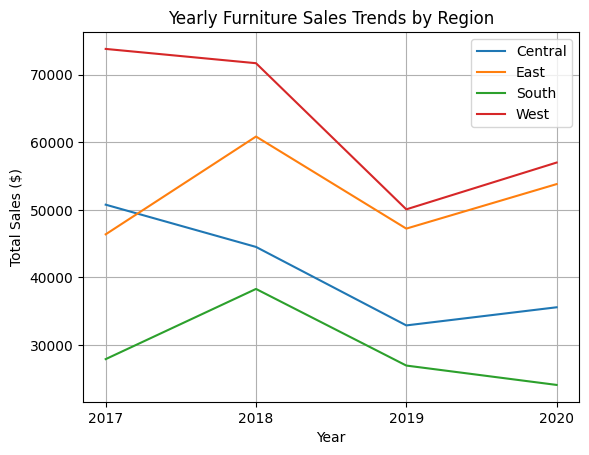

In [18]:
yearly_region_sales = furniture_data.groupby(['Year', 'Region']).agg(  
    Total_Sales=('Sales', 'sum')).reset_index()  

# Used ChatGPT to understand the logic behind the following code block. From my understanding, the for loop will iterate through 
# each unique region in yearly_region_sales, filter the data for that region, and then plot the total sales over each year. This will
# allow us to visually compare the sales trend across different regions in the same graph.

for region in yearly_region_sales['Region'].unique():                          
    region_data = yearly_region_sales[yearly_region_sales['Region'] == region]
    plt.plot(region_data['Year'], region_data['Total_Sales'], label=region)

plt.title('Yearly Furniture Sales Trends by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.xticks(yearly_region_sales['Year'].unique())
plt.legend()
plt.grid()
plt.show()

 Visualizing the distribution of Consumer, Corporate, and Home Office segments in the West region. 
 Result: Relatively good distribution in sales between segments suggests that there is a balanced demand across different customer segments, indicating a diverse market potential (products are appealing to a wide range of customers -> more sales).

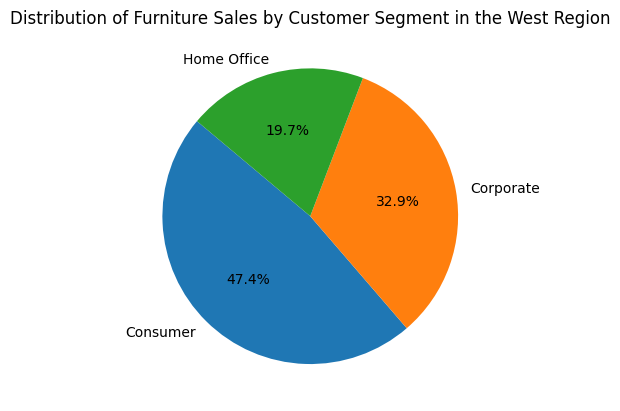

In [20]:
west_furniture_data = df[(df['Category'] == 'Furniture') & (df['Region'] == 'West')]

segment_sales_west = west_furniture_data.groupby('Segment')['Sales'].sum().reset_index()

# In the below code snippet I used startangle as a modifier for my pie chart, which I learned from ChatGPT. It's main purpose is
# to adjust the starting angle of the segments so that the chart is more visually appealing.

plt.pie(segment_sales_west['Sales'], labels=segment_sales_west['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Furniture Sales by Customer Segment in the West Region')
plt.show()

The data suggests that the West region is a great choice for test marketing. Since other regions have similar AOVs, the product has potential to succeed elsewhere too. Additionally, as established in previously, test marketing may be easier with its high demand.

In [24]:
aov_by_region = furniture_data.groupby('Region')['Sales'].mean().round(2).reset_index()     
aov_by_region.sort_values(by='Sales', ascending=False, inplace=True)                        

# I learned this method to rename a column from ChatGPT. The purpose is mainly for clarity and visual appeal!
aov_by_region.rename(columns={'Sales': 'Average Order Value'}, inplace=True)                

aov_by_region                                                                               

,Region,Average Order Value
3,West,357.30
2,South,353.31
1,East,346.57
0,Central,340.53


The West Region has the lowest total cost per sale at 0.85, suggesting that it is more efficient in managing costs relative to sales.

In [7]:
df['Total_Cost'] = df['Sales'] - df['Profit']   # Calculating total cost

region_analysis = df.groupby('Region').agg(     # Group by region and calculate total sales/cost (using the method I learned earlier)
    Total_Sales=('Sales', 'sum'),
    Total_Cost=('Total_Cost', 'sum'),
    Total_Profit=('Profit', 'sum')              
).reset_index()

region_analysis['Total_Cost_Per_Sale'] = region_analysis['Total_Cost'] / region_analysis['Total_Sales'] # Add cost per sale column

region_analysis

,Region,Total_Sales,Total_Cost,Total_Profit,Total_Cost_Per_Sale
0,Central,501239.8908,461533.5283,39706.3625,0.920784
1,East,678781.2400,587258.4600,91522.7800,0.865166
2,South,391721.9050,344972.4747,46749.4303,0.880657
3,West,725457.8245,617039.3756,108418.4489,0.850552


West region has the lowest average discount, suggesting that lower discounts = more sales, which also suggests that the luxury furniture being so expensive might not be that bad, we can see that the chart for sales is ini same order for chart of discount amount 

In [26]:
avg_discount_by_region = furniture_data.groupby('Region')['Discount'].mean().reset_index()  # average discount by region

avg_discount_by_region.columns = ['Region', 'Average Discount']   # I learned this method from ChatGPT. The purpose of this line is to
                                                                  # rename the columns for clarity (for instance "Average Discount"
avg_discount_by_region                                            # makes much more sense than just "Discount".)

,Region,Average Discount
0,Central,0.297380
1,East,0.154077
2,South,0.121536
3,West,0.131400


I wanted to see the correlation between discounts and sales. Looks like higher discounts do not necessarily correlate to more sales. So more expensive line may not be as risky as it would be if there were a positive correlation between the two, which would suggest that customers are more wary of high prices. Instead, it seems that they are less likely to mind.

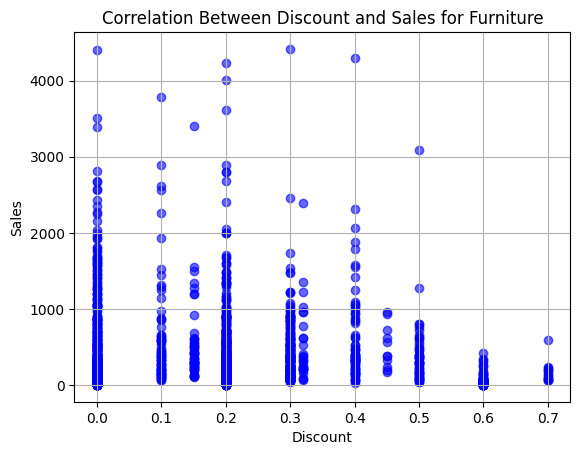

In [27]:
plt.scatter(furniture_data['Discount'], furniture_data['Sales'], alpha=0.6, color='blue') 
plt.title('Correlation Between Discount and Sales for Furniture')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Because I began to run out of space on my report, I decided to merge two of the previous tables into one using advice from ChatGPT.

In [58]:
combined_table = pd.merge(aov_by_region, avg_discount_by_region, on='Region')   # I learned this method from ChatGPT to merge tables.
                                                                                # I mainly did so because I was running out of space on
combined_table                                                                  # my report, and the data points are somewhat related.
                                                                                # It is very similar to how you join tables in SQL, 
                                                                                # which I am also taking a class on at the moment.

,Region,Average_Order_Value,Average Discount
0,West,357.30,0.131400
1,South,353.31,0.121536
2,East,346.57,0.154077
3,Central,340.53,0.297380
